In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn import tree
from sklearn.metrics import roc_curve, auc


import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dataframe = pd.read_csv('Final_train.csv')
dataframe.columns

Index([u'Unnamed: 0', u'AdjDE_x', u'AdjDE_y', u'AdjOE_x', u'AdjOE_y',
       u'AdjTempo_x', u'AdjTempo_y', u'DE_x', u'DE_y', u'OE_x', u'OE_y',
       u'Pythag_x', u'Pythag_y', u'RankAdjDE_x', u'RankAdjDE_y',
       u'RankAdjOE_x', u'RankAdjOE_y', u'RankAdjTempo_x', u'RankAdjTempo_y',
       u'RankDE_x', u'RankDE_y', u'RankOE_x', u'RankOE_y', u'RankPythag_x',
       u'RankPythag_y', u'RankTempo_x', u'RankTempo_y', u'Result', u'Tempo_x',
       u'Tempo_y', u'game_id', u'season', u't1TeamName', u't1_id', u't1_score',
       u't1_teamname', u't2TeamName', u't2_id', u't2_score', u't2_teamname',
       u'team1_fg2pct', u'team1_fg3pct', u'team1_ftpct', u'team2_fg2pct',
       u'team2_fg3pct', u'team2_ftpct', u'x_pt_team_season_losses',
       u'x_pt_team_season_wins', u'x_rpi_rating', u'x_seed',
       u'y_pt_team_season_losses', u'y_pt_team_season_wins', u'y_rpi_rating',
       u'y_seed'],
      dtype='object')

In [3]:
columns = [
 'AdjDE_x',
 'AdjDE_y',
 'AdjOE_x',
 'AdjOE_y',
 'AdjTempo_x',
 'AdjTempo_y',
 'Pythag_x',
 'Pythag_y',
 'team1_fg2pct',
 'team1_fg3pct',
 'team1_ftpct',
 'team2_fg2pct',
 'team2_fg3pct',
 'team2_ftpct',
 'x_pt_team_season_losses',
 'x_pt_team_season_wins',
 'x_rpi_rating',
 'x_seed',
 'y_pt_team_season_losses',
 'y_pt_team_season_wins',
 'y_rpi_rating',
 'y_seed']

fantastic_four = ['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']

In [4]:
X = dataframe[columns]

Y = dataframe.Result
Y = np.ravel(Y)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print len(X_train), len(Y_train), len(X_test), len(Y_test)

557 557 240 240


In [6]:
log_reg = LogisticRegression()
rand_for = RandomForestClassifier()
dec_tree = DecisionTreeClassifier()
bag_class = BaggingClassifier()
naive_bay = GaussianNB()
k_near_n = KNeighborsClassifier()

<h1><b>LOGISTIC REGRESSION</b></h1>

In [7]:
log_reg_RFE = RFE(log_reg, 6)
log_reg_RFE.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

log_reg_RFE_df = pd.DataFrame()

log_reg_RFE_df['Rank'] = log_reg_RFE.ranking_
log_reg_RFE_df['Feature'] = X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']].columns
log_reg_RFE_df['Support'] = log_reg_RFE.support_
log_reg_RFE_df[log_reg_RFE_df.Support == True]


,Rank,Feature,Support
0,1,Pythag_x,True
1,1,Pythag_y,True
2,1,x_rpi_rating,True
3,1,y_rpi_rating,True


In [8]:
print 'Logistic Regression model accuracy: ' + str(log_reg_RFE.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Logistic Regression model accuracy: 0.725


In [9]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
log_reg_RFE.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
logreg_roc_auc = auc(false_positive_rate, true_positive_rate)

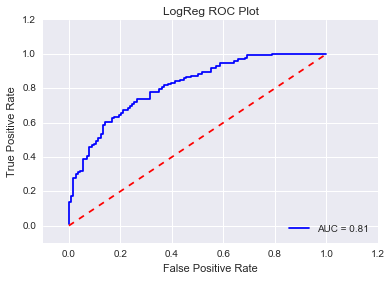

In [10]:
plt.title('LogReg ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% logreg_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [11]:
log_reg_export = pd.DataFrame(log_reg_RFE.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
log_reg_export['GameID'] = dataframe.game_id
log_reg_export['Season'] = dataframe.season
log_reg_export['Actual_Result'] = dataframe.Result

In [12]:
log_reg_export.to_csv('Logistic_Regression_Test.csv')

<h1><b>DECISION TREE</b></h1>

In [13]:
dec_tree_RFE = RFE(dec_tree, 4)
dec_tree_RFE.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

dec_tree_RFE_df = pd.DataFrame()

dec_tree_RFE_df['Rank'] = dec_tree_RFE.ranking_
dec_tree_RFE_df['Feature'] = X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']].columns
dec_tree_RFE_df['Support'] = dec_tree_RFE.support_
dec_tree_RFE_df[dec_tree_RFE_df.Support == True]

,Rank,Feature,Support
0,1,Pythag_x,True
1,1,Pythag_y,True
2,1,x_rpi_rating,True
3,1,y_rpi_rating,True


In [14]:
print 'Decision Tree model accuracy: ' + str(dec_tree_RFE.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Decision Tree model accuracy: 0.7375


In [15]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
dec_tree_RFE.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
dec_tree_roc_auc = auc(false_positive_rate, true_positive_rate)

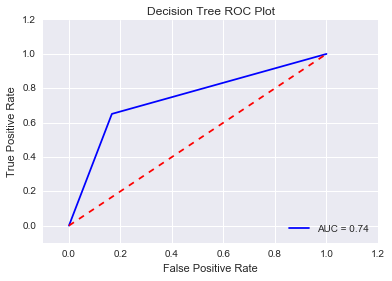

In [16]:
plt.title('Decision Tree ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% dec_tree_roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [17]:
dec_tree_export = pd.DataFrame(dec_tree_RFE.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
dec_tree_export['GameID'] = dataframe.game_id
dec_tree_export['Season'] = dataframe.season
dec_tree_export['Actual_Result'] = dataframe.Result

In [18]:
dec_tree_export.to_csv('Decision_Tree_test.csv')

<h1><b>NAIVE BAYES</b></h1>

In [19]:
naive_bay.fit(X_train[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_train)

print 'Naive Baye model accuracy: ' + str(naive_bay.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

Naive Baye model accuracy: 0.775


In [20]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
naive_bay.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
naive_bay_auc = auc(false_positive_rate, true_positive_rate)

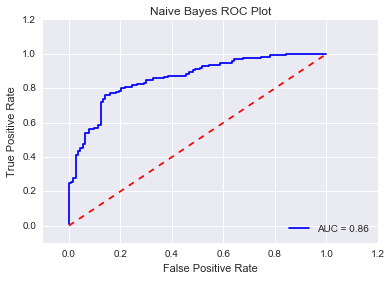

In [21]:
plt.title('Naive Bayes ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% naive_bay_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [22]:
naive_bay_export = pd.DataFrame(naive_bay.predict_proba(X[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']]))
naive_bay_export['GameID'] = dataframe.game_id
naive_bay_export['Season'] = dataframe.season
naive_bay_export['Actual_Result'] = dataframe.Result

In [23]:
naive_bay_export.to_csv('Naive_Bay_test.csv')

<h1><b>K NEAREST NEIGHBOR CLASSIFIER</b></h1>

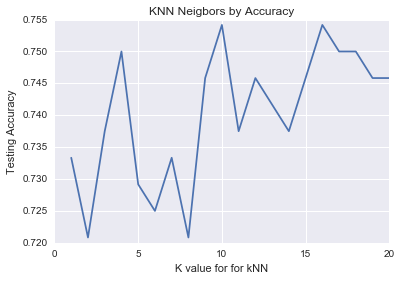

In [24]:
# Test k values 1 through 20
k_range = range(1, 21)

# Set an empty list
accuracy = []

# Repeat above process for all k values and append the result
for k in k_range:
    k_near_n = KNeighborsClassifier(n_neighbors= k)
    k_near_n.fit(X_train[fantastic_four], Y_train)
    Y_pred = k_near_n.predict(X_test[fantastic_four])
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

plt.title('KNN Neigbors by Accuracy')
plt.plot(k_range, accuracy)
plt.xlabel('K value for for kNN')
plt.ylabel('Testing Accuracy')

In [26]:
k_near_n = KNeighborsClassifier(n_neighbors= 4)
k_near_n.fit(X_train[fantastic_four], Y_train)
print 'KNN model accuracy: ' + str(k_near_n.score(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']], Y_test))

KNN model accuracy: 0.75


In [27]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
k_near_n.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
knn_auc = auc(false_positive_rate, true_positive_rate)

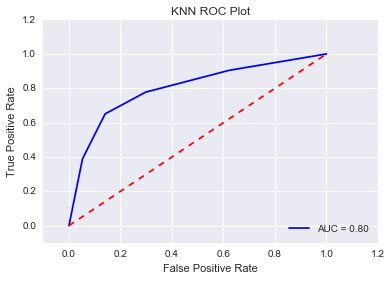

In [28]:
plt.title('KNN ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% knn_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [29]:
knn_export = pd.DataFrame(k_near_n.predict_proba(X[fantastic_four]))
knn_export['GameID'] = dataframe.game_id
knn_export['Season'] = dataframe.season
knn_export['Actual_Result'] = dataframe.Result

In [30]:
knn_export.to_csv('KNN_test.csv')

<h1><b>RANDOM FOREST</b></h1>

In [31]:
rand_for.fit(X_train[fantastic_four], Y_train)

rand_for_df = pd.DataFrame()

rand_for_df['Feature'] = X_train[fantastic_four].columns
rand_for_df['Rank'] = rand_for.feature_importances_
rand_for_df.sort_values('Rank', inplace= True)

In [32]:
print 'Random forest model accuracy: ' + str(rand_for.score(X_test[fantastic_four], Y_test))

Random forest model accuracy: 0.7375


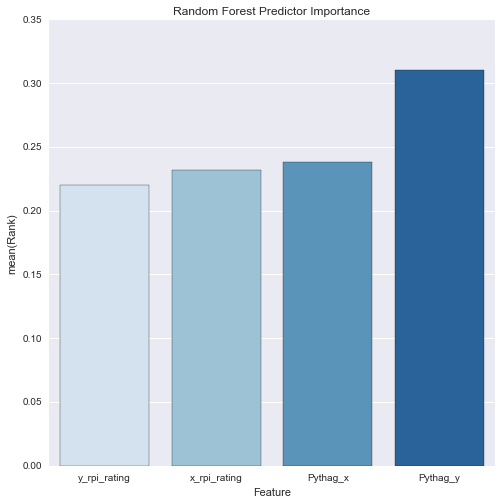

In [33]:
plt.figure(figsize=(8,8))
plt.title('Random Forest Predictor Importance')
sns.barplot(x= 'Feature', y = 'Rank', data = rand_for_df, palette= 'Blues')

In [34]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
rand_for.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
rand_for_auc = auc(false_positive_rate, true_positive_rate)

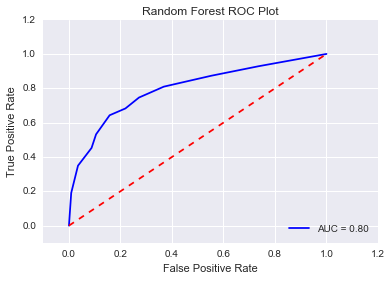

In [35]:
plt.title('Random Forest ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% rand_for_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [36]:
rand_for_export = pd.DataFrame(rand_for.predict_proba(X[fantastic_four]))
rand_for_export['GameID'] = dataframe.game_id
rand_for_export['Season'] = dataframe.season
rand_for_export['Actual_Result'] = dataframe.Result

In [37]:
rand_for_export.to_csv('Random_Forest_test.csv')

<h1><b>BAGGING CLASSIFIER</b></h1>

In [38]:
bag_class.fit(X_train[fantastic_four], Y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [39]:
print 'Bagging Cassifier accuracy: ' + str(bag_class.score(X_test[fantastic_four], Y_test))

Bagging Cassifier accuracy: 0.725


In [40]:
actual = Y_test
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, 
bag_class.predict_proba(X_test[['Pythag_x', 'Pythag_y', 'x_rpi_rating', 'y_rpi_rating']])[:,1])
bag_class_auc = auc(false_positive_rate, true_positive_rate)

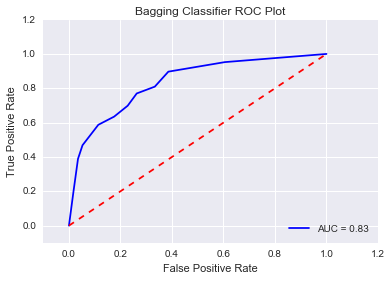

In [41]:
plt.title('Bagging Classifier ROC Plot')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% bag_class_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [42]:
bag_class_export = pd.DataFrame(bag_class.predict_proba(X[fantastic_four]))
bag_class_export['GameID'] = dataframe.game_id
bag_class_export['Season'] = dataframe.season
bag_class_export['Actual_Result'] = dataframe.Result

In [43]:
bag_class_export.to_csv('Bag_Class_test.csv')

In [44]:
### MODEL TESTING

In [45]:
test_set_16 = pd.read_csv('2016_Test_Set.csv')

In [46]:
X_16 = test_set_16[fantastic_four]

In [47]:
#log_reg = LogisticRegression()
#rand_for = RandomForestClassifier()
#dec_tree = DecisionTreeClassifier()
#bag_class = BaggingClassifier()
#naive_bay = GaussianNB()
#k_near_n = KNeighborsClassifier()

In [48]:
## LOGISTIC REGRESSION

game_id = test_set_16['game_id']
t116_name = test_set_16['team1_teamname']
t216_name = test_set_16['team2_teamname']
t1_seed = test_set_16['team1_seed']
t2_seed = test_set_16['team2_seed']

lreg = pd.DataFrame(log_reg_RFE.predict_proba(X_16))

In [49]:
lreg_16_export = pd.DataFrame()

lreg_16_export['game_id'] = game_id
lreg_16_export['t1_name'] = t116_name
lreg_16_export['t2_name'] = t216_name
lreg_16_export['t1_rpi'] = X_16.x_rpi_rating
lreg_16_export['t2_rpi'] = X_16.y_rpi_rating
lreg_16_export['t1_pyth'] = X_16.Pythag_x
lreg_16_export['t2_pyth'] = X_16.Pythag_y
lreg_16_export['t1_seed'] = t1_seed
lreg_16_export['t2_seed'] = t2_seed
lreg_16_export['prob_lose'] = lreg[0]
lreg_16_export['prob_win'] = lreg[1]

In [50]:
lreg_16_export.to_csv('2016_Testset_Models/Logisitc_TestSet16.csv')

In [51]:
## RANDOM FOREST CLASSIFIER

In [52]:
randfdf = pd.DataFrame(rand_for.predict_proba(X_16))

In [53]:
randf_16_export = pd.DataFrame()

randf_16_export['game_id'] = game_id
randf_16_export['t1_name'] = t116_name
randf_16_export['t2_name'] = t216_name
randf_16_export['t1_rpi'] = X_16.x_rpi_rating
randf_16_export['t2_rpi'] = X_16.y_rpi_rating
randf_16_export['t1_pyth'] = X_16.Pythag_x
randf_16_export['t2_pyth'] = X_16.Pythag_y
randf_16_export['t1_seed'] = t1_seed
randf_16_export['t2_seed'] = t2_seed
randf_16_export['prob_lose'] = randfdf[0]
randf_16_export['prob_win'] = randfdf[1]

In [54]:
randf_16_export.to_csv('2016_Testset_Models/RandForest_Test16.csv')

In [55]:
## NAIVE BAY

In [56]:
nbdf = pd.DataFrame(naive_bay.predict_proba(X_16))

In [57]:
nbdf_16_export = pd.DataFrame()

nbdf_16_export['game_id'] = game_id
nbdf_16_export['t1_name'] = t116_name
nbdf_16_export['t2_name'] = t216_name
nbdf_16_export['t1_rpi'] = X_16.x_rpi_rating
nbdf_16_export['t2_rpi'] = X_16.y_rpi_rating
nbdf_16_export['t1_pyth'] = X_16.Pythag_x
nbdf_16_export['t2_pyth'] = X_16.Pythag_y
nbdf_16_export['t1_seed'] = t1_seed
nbdf_16_export['t2_seed'] = t2_seed
nbdf_16_export['prob_lose'] = nbdf[0]
nbdf_16_export['prob_win'] = nbdf[1]

In [58]:
nbdf_16_export.to_csv('2016_Testset_Models/NaiveBay_Test16.csv')

In [59]:
## KNN CLASSIFIER

In [60]:
knndf = pd.DataFrame(k_near_n.predict_proba(X_16))

In [61]:
knndf_16_export = pd.DataFrame()

knndf_16_export['game_id'] = game_id
knndf_16_export['t1_name'] = t116_name
knndf_16_export['t2_name'] = t216_name
knndf_16_export['t1_rpi'] = X_16.x_rpi_rating
knndf_16_export['t2_rpi'] = X_16.y_rpi_rating
knndf_16_export['t1_pyth'] = X_16.Pythag_x
knndf_16_export['t2_pyth'] = X_16.Pythag_y
knndf_16_export['t1_seed'] = t1_seed
knndf_16_export['t2_seed'] = t2_seed
knndf_16_export['prob_lose'] = knndf[0]
knndf_16_export['prob_win'] = knndf[1]

In [62]:
knndf_16_export.to_csv('2016_Testset_Models/KNN_Test16.csv')

In [63]:
## DECISION TREE

In [64]:
dectreedf = pd.DataFrame(dec_tree_RFE.predict_proba(X_16))

In [65]:
dectreedf_16_export = pd.DataFrame()

dectreedf_16_export['game_id'] = game_id
dectreedf_16_export['t1_name'] = t116_name
dectreedf_16_export['t2_name'] = t216_name
dectreedf_16_export['t1_rpi'] = X_16.x_rpi_rating
dectreedf_16_export['t2_rpi'] = X_16.y_rpi_rating
dectreedf_16_export['t1_pyth'] = X_16.Pythag_x
dectreedf_16_export['t2_pyth'] = X_16.Pythag_y
dectreedf_16_export['t1_seed'] = t1_seed
dectreedf_16_export['t2_seed'] = t2_seed
dectreedf_16_export['prob_lose'] = dectreedf[0]
dectreedf_16_export['prob_win'] = dectreedf[1]

In [66]:
dectreedf_16_export.to_csv('2016_Testset_Models/DecTree_Test16.csv')

In [67]:
## BAGGING CLASSIFIER

In [68]:
bagdf = pd.DataFrame(bag_class.predict_proba(X_16))

In [69]:
bagdf_16_export = pd.DataFrame()

bagdf_16_export['game_id'] = game_id
bagdf_16_export['t1_name'] = t116_name
bagdf_16_export['t2_name'] = t216_name
bagdf_16_export['t1_rpi'] = X_16.x_rpi_rating
bagdf_16_export['t2_rpi'] = X_16.y_rpi_rating
bagdf_16_export['t1_pyth'] = X_16.Pythag_x
bagdf_16_export['t2_pyth'] = X_16.Pythag_y
bagdf_16_export['t1_seed'] = t1_seed
bagdf_16_export['t2_seed'] = t2_seed
bagdf_16_export['prob_lose'] = bagdf[0]
bagdf_16_export['prob_win'] = bagdf[1]

In [70]:
bagdf_16_export.to_csv('2016_Testset_Models/BagClass_Test16.csv')